<a href="https://colab.research.google.com/github/psv901/Sparks_Internship/blob/master/amazon_in_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
 
 
# Making a GET request
r = requests.get('https://www.trustpilot.com/review/amazon.in')
 
# check status code for response received
# success code - 200
print(r)
 
# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<Response [200]>
<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="Trustpilot" name="application-name"/>
  <meta content="#1c1c1c" name="theme-color"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link color="#00b67a" href="https://cdn.trustpilot.net/brand-assets/1.9.0/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="Trustpilot" name="apple-mobil

In [ ]:
# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')
 
# Getting the title tag
print(soup.title)
 
# Getting the name of the tag
print(soup.title.name)
 
# Getting the name of parent tag
print(soup.title.parent.name)
 
# use the child attribute to get
# the name of the child tag

<title>Amazon.in Reviews | Read Customer Service Reviews of amazon.in</title>
title
head


In [ ]:
lst = []
for txt in soup.find_all('p',class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"):
  lst.append(txt.text)
lst

['One of the most pathetic customer services, I have ever seen. The escalation has been pending from January 2023 and there has been no response from the team. They have taken the product as well as the money and now they say nothing can be done. There’s literally no help from them neither are they connecting me with delivery agent who has actually picked my product but not provided to the fulfilment centre. What is Amazon’s role in the business if they can’t even provide the basic security of the logistics of the product. Worst customer care ever. Needless to say they don’t care about the customer as they pretty okay with me not ordering ever again from Amazon',
 'It needs optimization in its UI. Its extremely glitchy sometimes. the customer is the worst thing about this site. they talk like a robot and will always disappoint you. Although they have almost everything on their site but the service is just terrible',
 'They are bunch of fools sitting in the customer service they are not

In [ ]:
for i in range(2,17):
  url = "https://www.trustpilot.com/review/amazon.in?page="+str(i)
  r = requests.get(url)
  soup = BeautifulSoup(r.content, 'html.parser')
  for txt in soup.find_all('p',class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"):
    lst.append(txt.text)
lst  



['One of the most pathetic customer services, I have ever seen. The escalation has been pending from January 2023 and there has been no response from the team. They have taken the product as well as the money and now they say nothing can be done. There’s literally no help from them neither are they connecting me with delivery agent who has actually picked my product but not provided to the fulfilment centre. What is Amazon’s role in the business if they can’t even provide the basic security of the logistics of the product. Worst customer care ever. Needless to say they don’t care about the customer as they pretty okay with me not ordering ever again from Amazon',
 'It needs optimization in its UI. Its extremely glitchy sometimes. the customer is the worst thing about this site. they talk like a robot and will always disappoint you. Although they have almost everything on their site but the service is just terrible',
 'They are bunch of fools sitting in the customer service they are not

In [ ]:
len(lst)

307

In [ ]:
dict = {'review':lst}
dict

{'review': ['One of the most pathetic customer services, I have ever seen. The escalation has been pending from January 2023 and there has been no response from the team. They have taken the product as well as the money and now they say nothing can be done. There’s literally no help from them neither are they connecting me with delivery agent who has actually picked my product but not provided to the fulfilment centre. What is Amazon’s role in the business if they can’t even provide the basic security of the logistics of the product. Worst customer care ever. Needless to say they don’t care about the customer as they pretty okay with me not ordering ever again from Amazon',
  'It needs optimization in its UI. Its extremely glitchy sometimes. the customer is the worst thing about this site. they talk like a robot and will always disappoint you. Although they have almost everything on their site but the service is just terrible',
  'They are bunch of fools sitting in the customer service

In [ ]:
import pandas as pd
new = pd.DataFrame.from_dict(dict)

In [ ]:
new

,review
0,"One of the most pathetic customer services, I ..."
1,It needs optimization in its UI. Its extremely...
2,They are bunch of fools sitting in the custome...
3,Sent a wrong probiotic supplement and refused ...
4,Amazon put my account on hold for no fault of ...
...,...
302,"I placed an order on 17th april,2016 and amazo..."
303,Nice Experience with Amazon.\r Product quality...
304,Good products and fast shipping.. I love Amazon
305,I have ordered many products from Amazon.in. I...


In [ ]:
new.to_csv('amazon_in.csv')

**TEXT PREPROCESSING**

In [ ]:
data= new[['review']]
data.head()

,review
0,"One of the most pathetic customer services, I ..."
1,It needs optimization in its UI. Its extremely...
2,They are bunch of fools sitting in the custome...
3,Sent a wrong probiotic supplement and refused ...
4,Amazon put my account on hold for no fault of ...


In [ ]:
#library that contains punctuation
import string
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['review'].apply(lambda x:remove_punctuation(x))
data.head()

,review,clean_msg
0,"One of the most pathetic customer services, I ...",One of the most pathetic customer services I h...
1,It needs optimization in its UI. Its extremely...,It needs optimization in its UI Its extremely ...
2,They are bunch of fools sitting in the custome...,They are bunch of fools sitting in the custome...
3,Sent a wrong probiotic supplement and refused ...,Sent a wrong probiotic supplement and refused ...
4,Amazon put my account on hold for no fault of ...,Amazon put my account on hold for no fault of ...


In [ ]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

In [ ]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

In [ ]:
import nltk
nltk.download('stopwords')
stopwords_cus = nltk.corpus.stopwords.words('english')
stopwords_cus.extend(['Amazon','amazon','AMAZON','amazoncouk', 'amazoncom','flipkart','Flipkart','FLIPKART'])
stopwords_cus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data['nostopwords'] = data['msg_tokenied']
for i in range(304):
  words = [word for word in data['msg_tokenied'][i][0].split() if word.lower() not in stopwords_cus]
  new_text = " ".join(words)
  data['nostopwords'][i] = new_text


data['nostopwords']

0      one pathetic customer services ever seen escal...
1      needs optimization ui extremely glitchy someti...
2      bunch fools sitting customer service even both...
3      sent wrong probiotic supplement refused return...
4      put account hold fault mine recently noticed a...
                             ...                        
302    placed order 17th april2016 said delivered til...
303    nice experience product quality 55 refund 55 f...
304      [good products and fast shipping i love amazon]
305    [i have ordered many products from amazonin i ...
306    [im very happy with amazon as the service are ...
Name: nostopwords, Length: 307, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [ ]:
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
data['msg_stemmed']=data['nostopwords'].apply(lambda x: stemming(x)) 

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['msg_lemmatized']=data['nostopwords'].apply(lambda x:lemmatizer(x)) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data.to_csv('amazon2.csv')

**AVERAGE LENGTH OF REVIEW**

In [ ]:
sum = 0
avg = 0
for i in range(304):
  temp = len(new['review'][i])
  sum = sum + temp
avg = sum/303
avg

558.1452145214521

In [ ]:
data['review']

0      One of the most pathetic customer services, I ...
1      It needs optimization in its UI. Its extremely...
2      They are bunch of fools sitting in the custome...
3      Sent a wrong probiotic supplement and refused ...
4      Amazon put my account on hold for no fault of ...
                             ...                        
302    I placed an order on 17th april,2016 and amazo...
303    Nice Experience with Amazon.\r Product quality...
304      Good products and fast shipping.. I love Amazon
305    I have ordered many products from Amazon.in. I...
306    I'm very happy with amazon as the service are ...
Name: review, Length: 307, dtype: object

In [ ]:
import spacy
import pandas as pd
import requests
from spacy import displacy
# import en_core_web_sm
 
nlp = spacy.load('en_core_web_sm')
 
from spacy.tokens import Span
from spacy.matcher import Matcher
 
import matplotlib.pyplot as plot
from tqdm import tqdm
import networkx as ntx

 
%matplotlib inline

In [ ]:
def extract_entities(sents):
   # chunk one
   enti_one = ""
   enti_two = ""
  
   dep_prev_token = "" # dependency tag of previous token in sentence
  
   txt_prev_token = "" # previous token in sentence
  
   prefix = ""
   modifier = ""
  
  
  
   for tokn in nlp(sents):
       # chunk two
       ## move to next token if token is punctuation
      
       if tokn.dep_ != "punct":
           #  check if token is compound word or not
           if tokn.dep_ == "compound":
               prefix = tokn.text
               # add the current word to it if the previous word is 'compound’
               if dep_prev_token == "compound":
                   prefix = txt_prev_token + " "+ tokn.text
                  
           # verify if token is modifier or not
           if tokn.dep_.endswith("mod") == True:
               modifier = tokn.text
               # add it to the current word if the previous word is 'compound'
               if dep_prev_token == "compound":
                   modifier = txt_prev_token + " "+ tokn.text
                  
           # chunk3
           if tokn.dep_.find("subj") == True:
               enti_one = modifier +" "+ prefix + " "+ tokn.text
               prefix = ""
               modifier = ""
               dep_prev_token = ""
               txt_prev_token = ""
              
           # chunk4
           if tokn.dep_.find("obj") == True:
               enti_two = modifier +" "+ prefix +" "+ tokn.text
              
           # chunk 5
           # update variable
           dep_prev_token = tokn.dep_
           txt_prev_token = tokn.text
          
   return [enti_one.strip(), enti_two.strip()]

In [ ]:
entities = []
for i in range(len(data)):
  entities.append(extract_entities(data['review'][i]))



In [ ]:
entities

[['they', 'again  Amazon'],
 ['almost  service', 'almost  site'],
 ['just U I', 'again Amazon fools'],
 ['wrong  some', 'just email image'],
 ['I', 'two Prime fault'],
 ['24 contact Number 781.2076///73', '24  house'],
 ['5  days', 'amazon india'],
 ['worst customer I', 'life'],
 ['Clearly language this', 'best  customer'],
 ['I', 'extremely  Amazon.se'],
 ['UCalling 0988.3852,761,,Customer Care number', 'businesses'],
 ['where  people', 'other  customers'],
 ['when  I', 'Total mirror money'],
 ['I', 'Amazon'],
 ['Contact centre response', 'advance'],
 ['also  It', 'probably  Flipkart'],
 ['very  This', 'very  service'],
 ['only inspection ways', 'patience'],
 ['they', 'amazon'],
 ['you', 'issued  them'],
 ['5 star Reviews', '5  website'],
 ['you', 'issued  them'],
 ['', '9898 Flipkart customer care'],
 ['now  I', 'resolution'],
 ['they', 'still  MRP'],
 ['I', 'even  Amazon'],
 ['intelligents  they', 'return'],
 ['Flipkart', 'them'],
 ['you', '2 consumer court'],
 ['10 AMAZON INDIA NOW

In [ ]:
def obtain_relation(sent):
  
   doc = nlp(sent)
  
   matcher = Matcher(nlp.vocab)
  
   pattern = [{'DEP':'ROOT'},
           {'DEP':'prep','OP':"?"},
           {'DEP':'agent','OP':"?"}, 
           {'POS':'ADJ','OP':"?"}]
  
   matcher.add("matching_1",  [pattern])
  
   matcher = matcher(doc)
   h = len(matcher) - 1
  
   span = doc[matcher[h][1]:matcher[h][2]]
  
   return (span.text)

In [ ]:
relations = []

for i in range(len(data)):
  relations.append(obtain_relation(data['review'][i]))

In [ ]:
relations

['Needless',
 'is',
 'Bunch of',
 'are',
 'paid',
 'call',
 'buy on',
 'gave only',
 'is',
 'experienced',
 'U',
 'was',
 'waste of',
 'request',
 'is poor',
 "'s",
 'customer',
 'gave',
 'are',
 'face with',
 'rust',
 'face with',
 'Limited',
 'need',
 'made',
 'done',
 'oh',
 'is',
 'Running',
 'Handled',
 'supposed',
 'are ready',
 '’s hideous',
 'priced compared',
 'be careful',
 'Thank',
 'fail',
 'think',
 'mockery of',
 'washed',
 'get better',
 'is',
 'trust',
 'play with',
 'been',
 'am',
 'increased by',
 'Let',
 'get out',
 'accepts',
 'BECOME WORST',
 'paid',
 'rediculous',
 'lost',
 'Needs more',
 'purchase from',
 'called',
 'BECOME WORST',
 'told',
 'loose',
 'have poor',
 'ON',
 'delivery',
 'been with',
 'come',
 'U.',
 'have',
 'sold defective',
 'have',
 'keeps',
 'Get',
 'is',
 'gets satisfied',
 'untrained',
 'U.',
 'is',
 'experience with reputable',
 'Thank',
 'U.',
 'Thanks',
 'fix',
 'bought',
 'takes',
 'charged',
 'delete',
 'Calling',
 'comes',
 'was cheap',

In [ ]:
pd.Series(relations).value_counts()[:50]

is                23
service           10
Thank              6
have               6
customer           4
been               4
told               3
love               3
care               3
U.                 3
going              3
Amazon             3
's                 3
was                3
think              3
are                3
Call               3
give               2
Calling            2
number             2
delivery           2
BECOME WORST       2
bought             2
experience         2
paid               2
Thanks for         2
face with          2
pay                2
Thanks             2
sent               2
call               2
experienced        2
let                1
Marketplace        1
write about        1
RAHMAN             1
Is                 1
seems              1
trusting           1
Flipkart           1
cheating right     1
Revert             1
order              1
value              1
understand         1
Needless           1
encouraged         1
reccomendits 

In [ ]:
source = [j[0] for j in entities]

#object extraction
target = [k[1] for k in entities]

data_kgf = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
graph = ntx.from_pandas_edgelist(data_kgf, "source", "target",
                         edge_attr=True, create_using=ntx.MultiDiGraph())

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


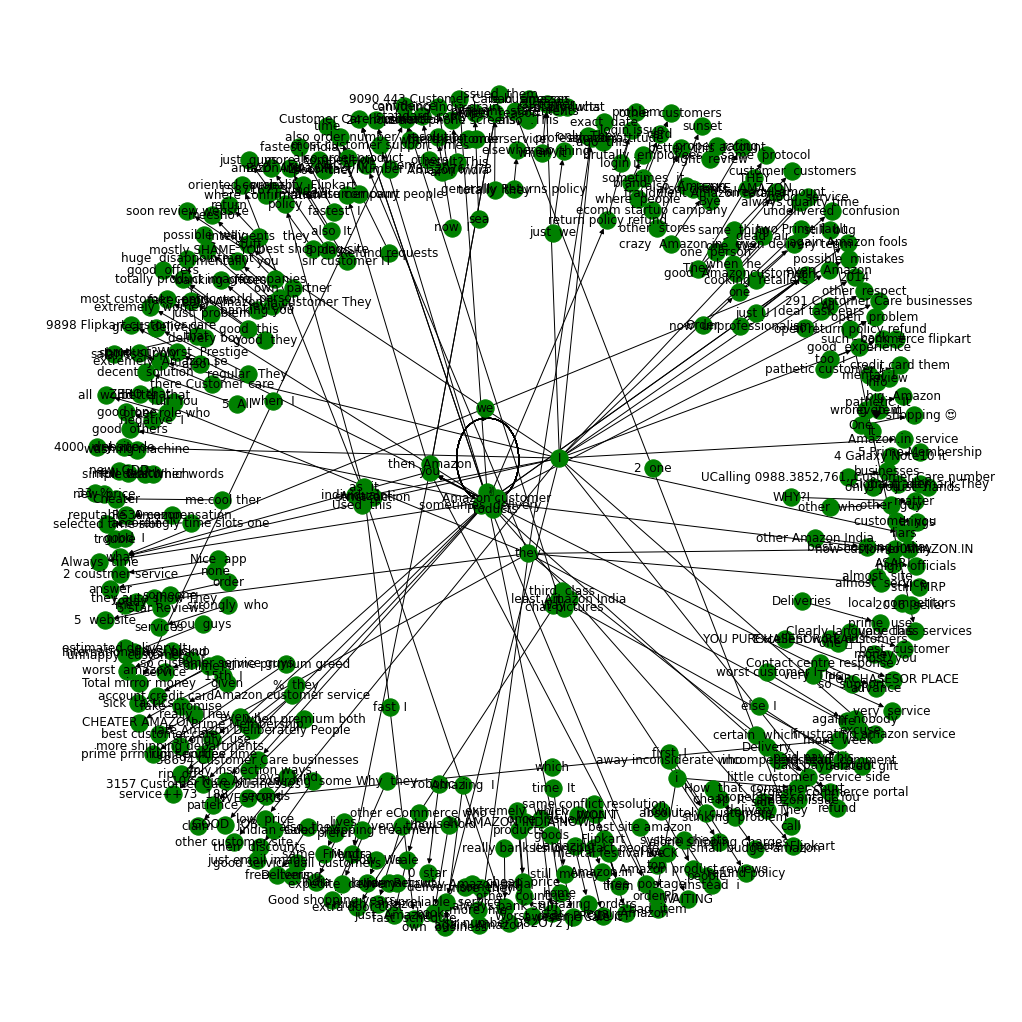

In [ ]:
plot.figure(figsize=(14, 14))
posn = ntx.spring_layout(graph)
ntx.draw(graph, with_labels=True, node_color='green', edge_cmap=plot.cm.Blues, pos = posn)
plot.show()

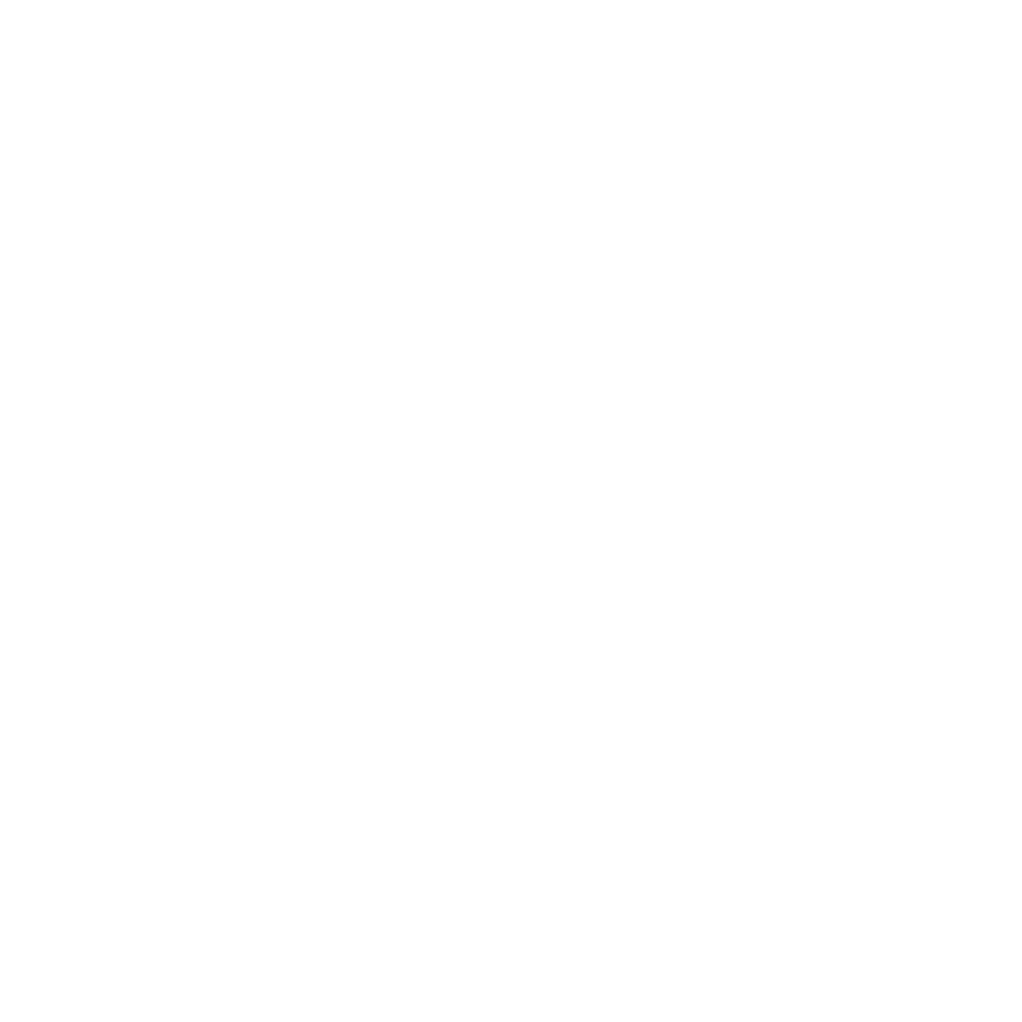

In [ ]:
graph = ntx.from_pandas_edgelist(data_kgf[data_kgf['edge']=="Information from"], "source", "target",
                         edge_attr=True, create_using=ntx.MultiDiGraph())
 
plot.figure(figsize=(14,14))
pos = ntx.spring_layout(graph, k = 0.5) # k regulates the distance between nodes
ntx.draw(graph, with_labels=True, node_color='green', node_size=1400, edge_cmap=plot.cm.Blues, pos = posn)
plot.show()